In [164]:
##########Boston Home Price Linear Regression ###################
# Amin Boroomand, December 2022
#Dataset: Diabete built-in Sickit Learn Dataset
#https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html
#objective: predicting music genre based on age and sex
#Algorithm: Linear Regression
###########################################################

In [165]:
#To DO in future:
#1_Check linear regression assumptions
#2-compute the ridge or lasso regression and compare the results
#update Readme

In [166]:
#Imports
from sklearn import linear_model
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from numpy import mean, std
from scipy.stats import sem
import seaborn as sn
import pandas as pd
import numpy as np

In [120]:
#Downloading the file
! wget https://github.com/dataprofessor/data/raw/master/BostonHousing.csv

--2022-12-28 21:28:05--  https://github.com/dataprofessor/data/raw/master/BostonHousing.csv
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/data/master/BostonHousing.csv [following]
--2022-12-28 21:28:05--  https://raw.githubusercontent.com/dataprofessor/data/master/BostonHousing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8001::154, 2606:50c0:8002::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36242 (35K) [text/plain]
Saving to: ‘BostonHousing.csv.2’

BostonHousing.csv.2 100%[===================>]  35.39K  --.-KB/s    in 0.005s  

2022-12-28 21:28:05 (6.75 MB/s) - ‘BostonHousing.csv.2’ saved [36242/36242]



In [167]:
#Reading the CSV file
Boston_H=pd.read_csv("BostonHousing.csv")
Boston_H.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [168]:
#Data Cleaning
#checking for any missing data
print(Boston_H[Boston_H.isna().any(axis=1)])

# Check for duplicated rows
print(Boston_H[Boston_H.duplicated(subset=None, keep='first')])
Boston_H=Boston_H.drop_duplicates()

#Check for outliers
print(Boston_H.describe())
print(Boston_H["crim"].sort_values())

Empty DataFrame
Columns: [crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, b, lstat, medv]
Index: []
Empty DataFrame
Columns: [crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, b, lstat, medv]
Index: []
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad   

In [169]:
#Setting the X and Y
#The last column, medV, is the Y variable. Other columns are X variables. 
Y=Boston_H.medv
X=Boston_H.drop(["medv"], axis=1)

In [170]:
#setting the training and testing portions
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [171]:
#selecting the model
model=linear_model.LinearRegression()

In [172]:
#Training the model
model.fit(X_train,Y_train)
#using the model for prediction, evaluating the model using the blind set
Y_predict=model.predict(X_test)

In [173]:
#Computing Adjusted r2
n=len(X_train)
k=len(X.columns)
Adjusted_r2= 1-((1-r2_score(Y_predict, Y_test))*((n-1)/(n-k-1)))

In [174]:
#model metrics
print("Model Coefficients",model.coef_)
print("Model intercept %.2f" % model.intercept_)
print("coefficient of determination,r2 %.2f" % r2_score(Y_predict, Y_test))
print("Mean Squared Error %.2f" % mean_squared_error(Y_predict, Y_test))
print("Mean absolute Error %.2f" % mean_absolute_error(Y_predict, Y_test))
print("r2 %.2f"% r2_score(Y_predict, Y_test))
print("Adjusted_r2 %.2f"% Adjusted_r2)

Model Coefficients [-1.01792521e-01  5.36879224e-02  1.32200544e-03  3.01771768e+00
 -1.93419266e+01  3.10505147e+00  1.06335608e-02 -1.67144041e+00
  2.97656290e-01 -1.09019218e-02 -9.68963517e-01  9.24161678e-03
 -5.84753900e-01]
Model intercept 42.58
coefficient of determination,r2 0.64
Mean Squared Error 19.65
Mean absolute Error 3.31
r2 0.64
Adjusted_r2 0.62


In [175]:
#Regression equation
equation=str(Y.name+" = %.2f"%model.intercept_+"+")
coef=model.coef_
for i in  range (len(X.columns)):
    equation=equation+"(%.2f" % coef[i]+"*"+X.columns[i]+")"+"+"
    #,"%.2f" % coef[i],"*", X.columns[i],")","+")
equation[:-1]

'medv = 42.58+(-0.10*crim)+(0.05*zn)+(0.00*indus)+(3.02*chas)+(-19.34*nox)+(3.11*rm)+(0.01*age)+(-1.67*dis)+(0.30*rad)+(-0.01*tax)+(-0.97*ptratio)+(0.01*b)+(-0.58*lstat)'

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predicted')

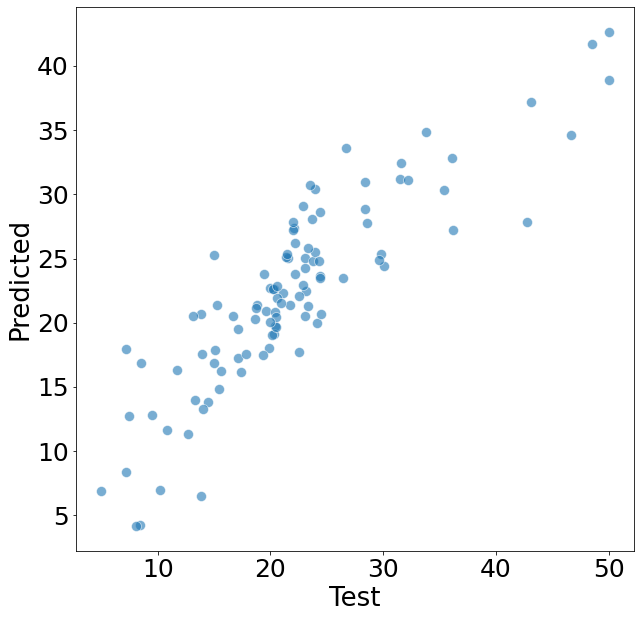

In [176]:
plt.rcParams["xtick.labelsize"] = 25
plt.rcParams["ytick.labelsize"] = 25
plt.figure(figsize=(10,10))
sn.scatterplot(Y_test, Y_predict, s=100, alpha=0.6)
plt.xlabel('Test',fontsize=26)
plt.ylabel('Predicted',fontsize=26)


Here, I would like to evaluate the model, using repeated cross-validation. For that, I need to find a good repeat number for my 10-fold cross-validation. Ideally, I would like to select a number of repeats that shows both minimizations of the standard error and stabilizing of the mean estimated performance compared to other numbers of repeats.

In [177]:
#Evaluating the model with different number of Cross-validation repeat
def model_eval (X,Y,repeat,model):
    cv=RepeatedKFold(n_splits=10,n_repeats=repeat,random_state=2022)
    r2= cross_val_score(model,X,Y,scoring="r2",cv=cv,n_jobs=-1)
    MSE= cross_val_score(model,X,Y,scoring="neg_mean_squared_error",cv=cv,n_jobs=-1)
    #scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    return r2, MSE
    

In [178]:
r2, MSE= model_eval (X,Y,5,model)

In [179]:
r2.mean()

0.7035084359222598

In [193]:
r2_list=[]
MSE_list=[]
repeat_range=range(1,16)
print("RN r2_Mean SE_r2 -MSE_Mean SE_MSE")
for repeat_num in repeat_range:
    r2, MSE= model_eval (X,Y,repeat_num,model)

    print("%d) %.3f %.4f %.3f %.4f" % (repeat_num, mean(r2), sem(r2),  mean(MSE), sem(MSE)))
    r2_list.append(r2)
    MSE_list.append(MSE)
#r2_list = list(np.around(np.array(r2_list),2))


RN r2_Mean SE_r2 -MSE_Mean SE_MSE
1) 0.697 0.0390 -24.035 3.0500
2) 0.703 0.0223 -23.853 1.8502
3) 0.707 0.0167 -23.736 1.4510
4) 0.700 0.0158 -23.843 1.1968
5) 0.704 0.0131 -23.877 1.0686
6) 0.704 0.0116 -23.840 0.9774
7) 0.703 0.0104 -23.852 0.8754
8) 0.704 0.0097 -23.899 0.8904
9) 0.705 0.0091 -23.855 0.8262
10) 0.705 0.0084 -23.881 0.8204
11) 0.706 0.0081 -23.856 0.7805
12) 0.706 0.0077 -23.862 0.7378
13) 0.707 0.0073 -23.859 0.7359
14) 0.707 0.0070 -23.853 0.7156
15) 0.707 0.0069 -23.868 0.6918


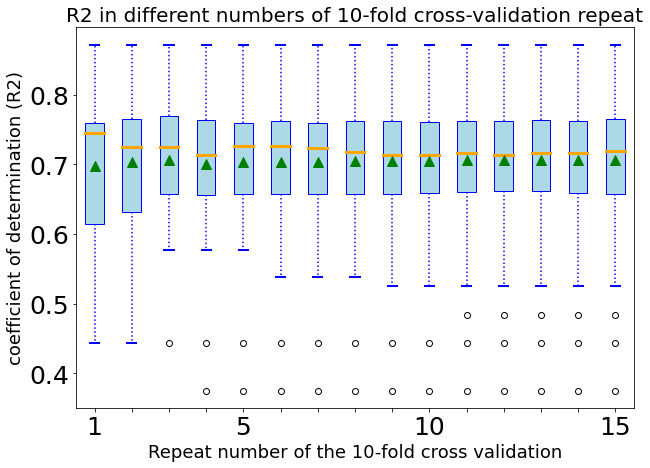

In [199]:
plt.figure(figsize=(10,7))
plot=plt.boxplot(r2_list, labels=[1,"","","",5,"","","","",10,"","","","",15],showmeans=True, patch_artist = True,
                 boxprops={"facecolor":"lightblue", "color":"blue"},
                meanprops={"marker":"^","markerfacecolor":"green", "markeredgecolor":"green", "markersize":10})
#colors = ['pink']
plt.title("R2 in different numbers of 10-fold cross-validation repeat", fontsize=20)
plt.xlabel('Repeat number of the 10-fold cross validation', fontsize=18 )
plt.ylabel('coefficient of determination (R2)', fontsize=18)

for whisker in plot['whiskers']:
    whisker.set(color ='blue',
                linewidth = 1.5,
                linestyle =":")
    
for cap in plot['caps']:
    cap.set(color ='blue',
            linewidth = 2)
    
for median in plot['medians']:
    median.set(color ='orange',
               linewidth = 3)




plt.show()

Box and Whisker Plots of the coefficient of determination (r2) of a linear regresson model for different repeat number of a 10-fold cross validation. 
The orange line indicates the median of the distribution and the green triangle represents the arithmetic mean. If these symbols (values) coincide, it suggests a reasonable symmetric distribution and that the mean may capture the central tendency well.Therefore, ***10 repeat* of the *10-fold cross validation* is a good choice.** 